A question I've asked myself repeatedly. It's always interesting when a new deep learning architecture is able to beat the state of the art. The MNIST dataset has 10,000 images in the test class.  At the time of writing Hinton's capsule networks has achieved the state of the art with 0.25% test error.  This translates to 25 misclassified digits.  Not bad at all.  But what do these digits look like?  How does this compare to human performance?

In this blog post I'm not going to answer the above questions, but I am going to take a look at a slightly simpler question that should hopefully help with our intuition for how good deep learning is.  Below I build a simple convnet using keras, and train on MNIST.  After training I achieve a 0.77% error rate (77 misclassified trained images).  Let's take a look at what these misclassified digits look like!

In [36]:
import keras
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

num_classes = 10
img_rows, img_cols = 28, 28

<!-- TEASER_END -->

In [57]:
def plot_img_grid(imgs, rows, cols):
    h = img_cols
    w = img_rows
    out = np.zeros((rows*h, cols*w), dtype='f')
    i = 0
    for r in range(rows):
        for c in range(cols):
            x_off = c*w
            y_off = r*h
            if i < len(imgs): out[y_off:y_off+h,x_off:x_off+w] = imgs[i].squeeze()
            i+=1
    plt.imshow(out)
    plt.show()


In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [40]:
input_shape = (img_rows,img_cols,1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [41]:
batch_size = 128
epochs = 20

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 145us/step - loss: 0.1403 - acc: 0.9588 - val_loss: 0.0437 - val_acc: 0.9860
Epoch 2/5
60000/60000 [==============================] - 7s 124us/step - loss: 0.0504 - acc: 0.9851 - val_loss: 0.0340 - val_acc: 0.9895
Epoch 3/5
60000/60000 [==============================] - 8s 129us/step - loss: 0.0343 - acc: 0.9894 - val_loss: 0.0308 - val_acc: 0.9901
Epoch 4/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.0267 - acc: 0.9919 - val_loss: 0.0367 - val_acc: 0.9883
Epoch 5/5
60000/60000 [==============================] - 7s 125us/step - loss: 0.0195 - acc: 0.9940 - val_loss: 0.0327 - val_acc: 0.9908


In [43]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.029084632211621376
Test accuracy: 0.9933


In [46]:
y_test_pred = model.predict(x_test)
bad_imgs = [[] for i in range(10)]
for i in range(len(x_test)):
    actual = np.argmax(y_test[i])
    pred = np.argmax(y_test_pred[i])
    if actual == pred: continue
    x_img = x_test[i]
    #print("Actual: ", actual, " Predicted: ", pred)
    bad_imgs[actual].append(x_img)

Misclassified images that were actually 0


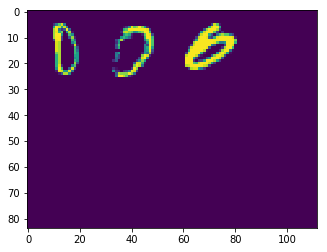

Misclassified images that were actually 1


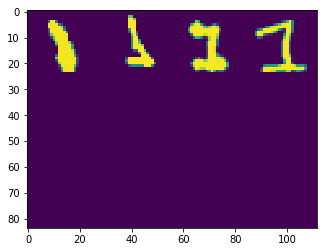

Misclassified images that were actually 2


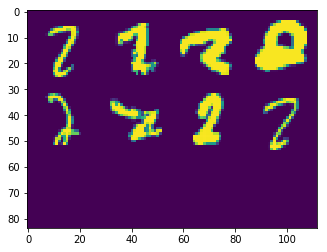

Misclassified images that were actually 3


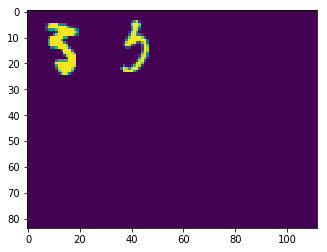

Misclassified images that were actually 4


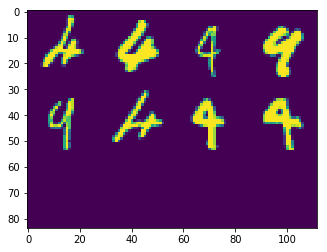

Misclassified images that were actually 5


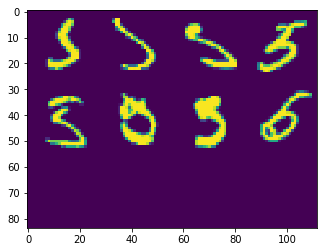

Misclassified images that were actually 6


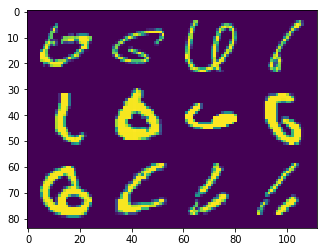

Misclassified images that were actually 7


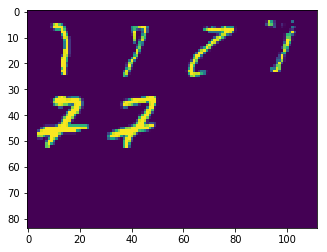

Misclassified images that were actually 8


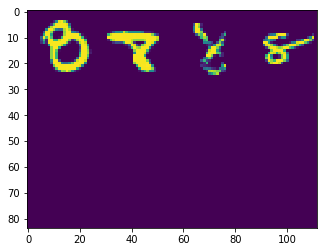

Misclassified images that were actually 9


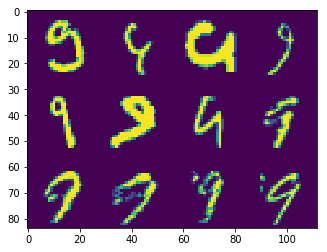

In [59]:
for i in range(10):
    print("Misclassified images that were actually %d" %(i))
    plot_img_grid(bad_imgs[i], 3,4)

10

# References
1. http://yann.lecun.com/exdb/mnist/
2. Hinton
